In [1]:
!gdown --id 1ZecBTGJogjXjZWdNnw0tlvpcbQVL1Wmg#demo-denoise3x-2x-weight
!pip install torch opencv-python
!git clone https://github.com/bilibili/ailab.git

Downloading...
From: https://drive.google.com/uc?id=1ZecBTGJogjXjZWdNnw0tlvpcbQVL1Wmg#demo-denoise3x-2x-weight
To: /content/up2x-latest-denoise3x.pth
100% 5.15M/5.15M [00:00<00:00, 221MB/s]
Cloning into 'ailab'...
remote: Enumerating objects: 123, done.
remote: Counting objects: 100% (123/123), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 123 (delta 41), reused 13 (delta 0), pack-reused 0
Receiving objects: 100% (123/123), 9.83 MiB | 14.82 MiB/s, done.
Resolving deltas: 100% (41/41), done.


done 0.49806737899780273


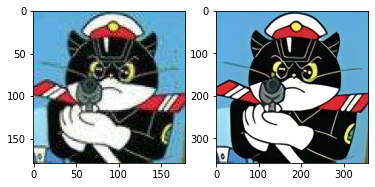

In [2]:
import sys
sys.path.append("/content/ailab/Real-CUGAN")
import matplotlib.pyplot as plt
%matplotlib inline
import torch
from torch import nn as nn
from torch.nn import functional as F
import os,sys,cv2
import numpy as np
from upcunet_v3 import RealWaifuUpScaler
from time import time as ttime
upscaler2x = RealWaifuUpScaler(2, "/content/up2x-latest-denoise3x.pth", half=True, device="cuda:0")
img = cv2.imread("/content/ailab/Real-CUGAN/demos/test-img.jpg")[:, :, [2, 1, 0]]
t0 = ttime()
result = upscaler2x(img,tile_mode=0)
t1 = ttime()
cv2.imwrite("/content/output-2x-denoise3x.png",result[:, :, ::-1])
print("done", t1 - t0)
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(result)
plt.show()